Problem: contaminant uptake rates either lead to very high uptake, or, when lowered even slightly, can lead to no uptake at all
Testing the lowest uptake rates that lead to actual contaminant uptake.

### Test Descriptions & Notes

Using code version 6699 with modifications as described in [this notebook](https://github.com/SS-Atlantis/analysis-raisha/blob/main/notebooks/SSAM-output-biopools.ipynb).

Regarding mass of contaminant within the biology: Beth indicates that the volume is a bit abstract and the mass of the biology is as if it was spread over the entire box layer.

Half lives

| PAH Concentration	|	Naphthalene |	Phenanthrene | Pyrene |	Benzo(a)pyrene |
|-------------------|---------------|-----------------|--------|----------|
| Half life (secs)	|	259200 |	3628800	| 20476800	| 19353600 |
| Half life (days)	|	3	| 42 |	237 |	224 |

### Package and file imports

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
from pathlib import Path
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot
from ssam_groups import cohorts

In [15]:
scenario_root = Path('/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/')
scenario_paths = sorted([p for p in scenario_root.glob('5b_v6699*linear*/outputSalishSea.nc')])
scenario_datasets = [xr.open_dataset(scen,decode_cf=True) for scen in scenario_paths]

In [19]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Tests/5b_v6699_modified_linear/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)
time = np.ma.filled(control.variables['t'], np.nan)


In [16]:
scenario_labels = []
for path in scenario_paths:
    scenario_labels.append(path.parent.stem)

In [4]:
def plot_pah(scenario, time):
    fig, ax = plt.subplots(figsize = (14,3))
    
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time, contam_mass_t[0:time.size])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')

# Water Column

### Linear bio uptake

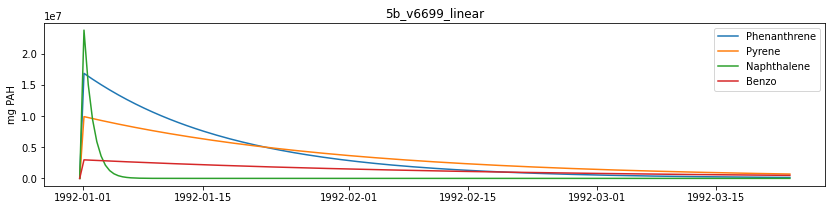

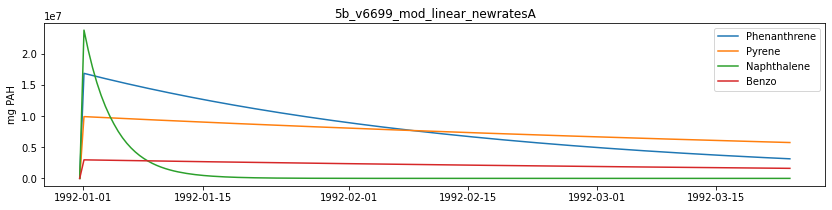

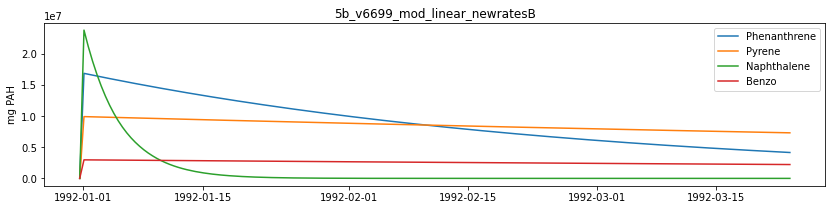

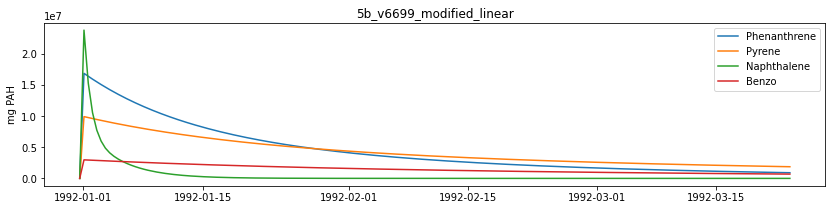

In [38]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    nm = path.parent.stem
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')
    ax.set_title(nm)

### Sigmoid bio uptake

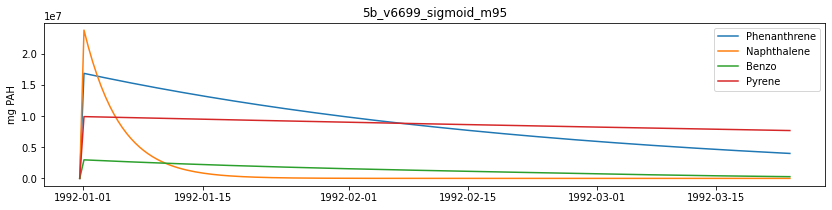

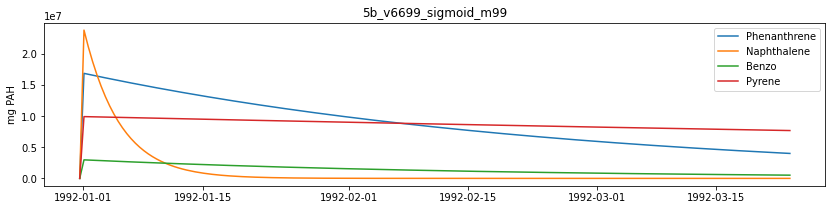

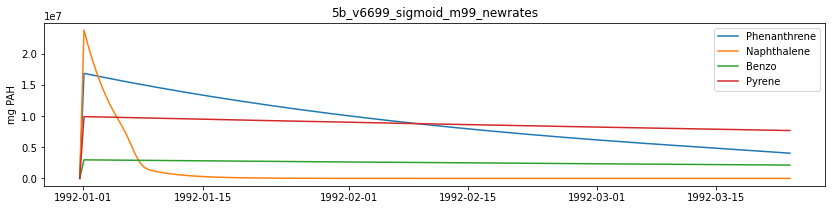

In [62]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    nm = path.parent.stem
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')
    ax.set_title(nm)

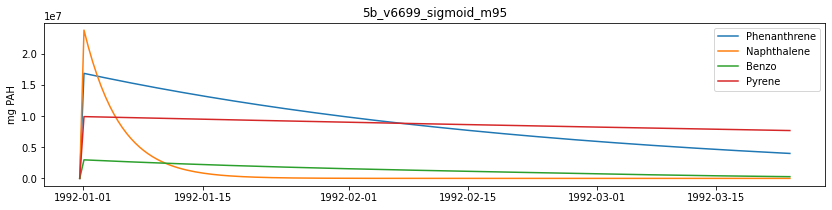

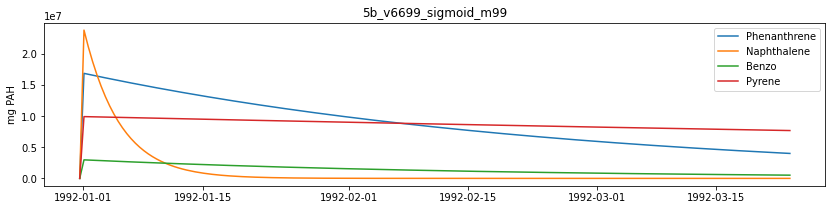

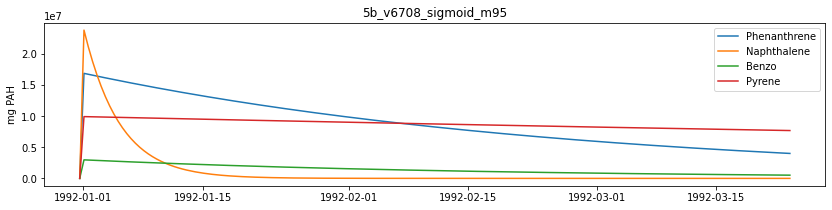

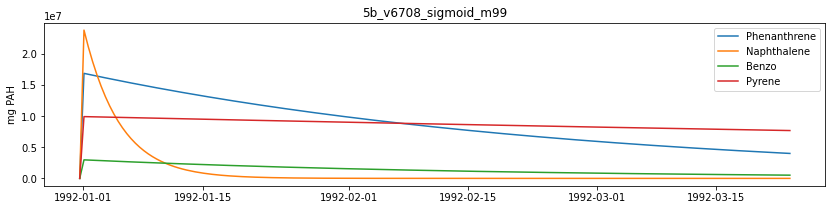

In [42]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    nm = path.parent.stem
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
    ax.legend(groups.pahs)
    ax.set_ylabel('mg PAH')
    ax.set_title(nm)

In [21]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    print(path.parent.stem)
    print(scenario.variables['Naphthalene'].shape)

5b_v6699_sigmoid_m67
(181, 130, 7)
5b_v6699_sigmoid_m95
(181, 130, 7)
5b_v6699_sigmoid_m98
(181, 130, 7)
5b_v6699_sigmoid_m99
(181, 130, 7)
5b_v6708_sigmoid_m95
(168, 130, 7)
5b_v6708_sigmoid_m98
(181, 130, 7)
5b_v6708_sigmoid_m99
(181, 130, 7)


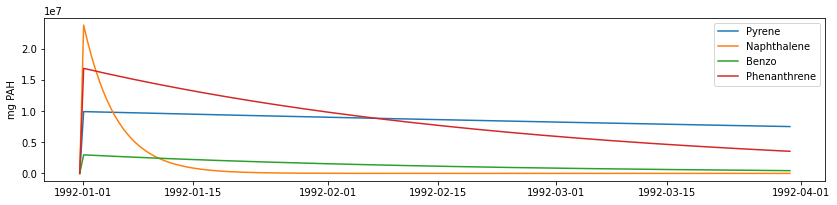

In [17]:
plot_pah(control, time)

# Biology

All scenarios on the same plot

In [21]:
def compare_scenario(group, pah):
    #for pah in groups.pahs:  
    fig, ax = plt.subplots(figsize = (14,3))
    names = []
    for scenario, path in zip(scenario_datasets, scenario_paths):
        names.append(path.parent.stem)
        boxes = groups.salish_sea
        contam_tbl = np.ma.filled(scenario.variables[group+'_' + pah][:,boxes,:], np.nan)
        volume_tbl = np.ma.filled(scenario.variables['volume'][:,boxes,:], np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time, contam_mass_t)
    ax.legend(names)
    ax.set_ylabel(group + ' PAH (mg)')
    ax.set_title(pah, fontsize = 12);

In [22]:
def compare_scenario_m3(group, pah):
    #for pah in groups.pahs:  
    fig, ax = plt.subplots(figsize = (14,3))
    names = []
    for scenario, path in zip(scenario_datasets, scenario_paths):
        names.append(path.parent.stem)
        boxes = groups.salish_sea
        contam_tbl = np.ma.filled(scenario.variables[group+'_' + pah][:,boxes,:], np.nan)
        contam_tb = contam_tbl.sum(axis=2)
        contam_t = contam_tb.sum(axis=1)
        ax.plot(time, contam_t)
    ax.legend(names)
    ax.set_ylabel(group + ' PAH (mg/m$^3$)')
    ax.set_title(pah, fontsize = 12);

In [23]:
def compare_scenario_perN(group, pah):
    #for pah in groups.pahs:  
    fig, ax = plt.subplots(figsize = (14,3))
    names = []
    for scenario, path in zip(scenario_datasets, scenario_paths):
        names.append(path.parent.stem)
        boxes = groups.salish_sea
        contam_tbl = np.ma.filled(scenario.variables[group+'_' + pah][:,boxes,:], np.nan)
        biomass_tbl = np.ma.filled(scenario.variables[group+'_N'][:,boxes,:], np.nan)
        contam_perN_tbl = contam_tbl * (1/(biomass_tbl+(biomass_tbl==0)))
        contam_perN_tb = contam_perN_tbl.sum(axis=2)
        contam_perN_t = contam_perN_tb.sum(axis=1)
        ax.plot(time, contam_perN_t)
    ax.legend(names)
    ax.set_ylabel(group + ' (mg PAH / mg N)')
    ax.set_title(pah, fontsize = 12);

All contaminants on the same plot

In [8]:
def compare_pah(group):
    for scenario, path in zip(scenario_datasets, scenario_paths):
        fig, ax = plt.subplots(figsize = (14,3))
        name = path.parent.stem
        boxes = groups.salish_sea
        for pah in groups.pahs:    
            contam_tbl = np.ma.filled(scenario.variables[group+'_' + pah][:,boxes,:], np.nan)
            volume_tbl = np.ma.filled(scenario.variables['volume'][:,boxes,:], np.nan)
            contam_mass_tbl = contam_tbl * volume_tbl
            contam_mass_tb = contam_mass_tbl.sum(axis=2)
            contam_mass_t = contam_mass_tb.sum(axis=1)
            ax.plot(time, contam_mass_t)
            ax.legend(groups.pahs)
            ax.set_ylabel(group + ' PAH (mg)')
            ax.set_title(name, fontsize = 12)

### Linear bio uptake

Percentage of maximum contaminant release that makes it into the phytoplankton

In [17]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    for pah in groups.pahs:
        contam_tbl = np.ma.filled(scenario.variables[pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        diatom_contam = np.ma.filled(scenario.variables['Diatom_'+pah], np.nan)
        diatom_contam_tbl = diatom_contam * volume_tbl
        diatom_contam_tb = diatom_contam_tbl.sum(axis=2)
        diatom_contam_t = diatom_contam_tb.sum(axis=1)
        max_percent = diatom_contam_t.max() / contam_mass_t.max() * 100
        print(path.parent.stem+' diatom '+pah+' is '+str(max_percent)+' % of contam released')

5b_v6699_linear diatom Phenanthrene is 17.305993007298152 % of contam released
5b_v6699_linear diatom Pyrene is 21.841493316535402 % of contam released
5b_v6699_linear diatom Naphthalene is 23.33602787659065 % of contam released
5b_v6699_linear diatom Benzo is 15.596013728125591 % of contam released
5b_v6699_mod_linear_newratesA diatom Phenanthrene is 2.9691457844726106 % of contam released
5b_v6699_mod_linear_newratesA diatom Pyrene is 5.458533316942234 % of contam released
5b_v6699_mod_linear_newratesA diatom Naphthalene is 4.152915799754532 % of contam released
5b_v6699_mod_linear_newratesA diatom Benzo is 3.0496848148634386 % of contam released


5b_v6699_mod_linear_newratesB diatom Phenanthrene is 0.3247138271663263 % of contam released
5b_v6699_mod_linear_newratesB diatom Pyrene is 0.59982162785612 % of contam released
5b_v6699_mod_linear_newratesB diatom Naphthalene is 0.4970308024143867 % of contam released
5b_v6699_mod_linear_newratesB diatom Benzo is 0.34414694833335396 % of contam released
5b_v6699_modified_linear diatom Phenanthrene is 14.579194418485722 % of contam released
5b_v6699_modified_linear diatom Pyrene is 17.880034861916673 % of contam released
5b_v6699_modified_linear diatom Naphthalene is 18.85206454276618 % of contam released
5b_v6699_modified_linear diatom Benzo is 13.352402273262113 % of contam released


All scenarios on the same plot for each contaminant

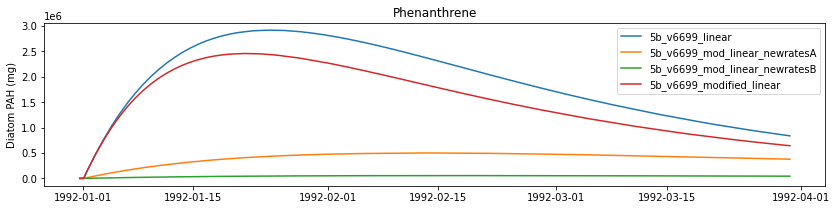

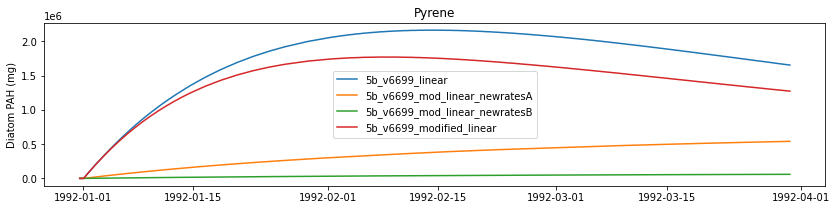

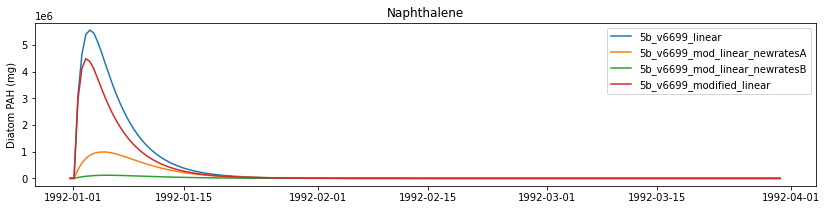

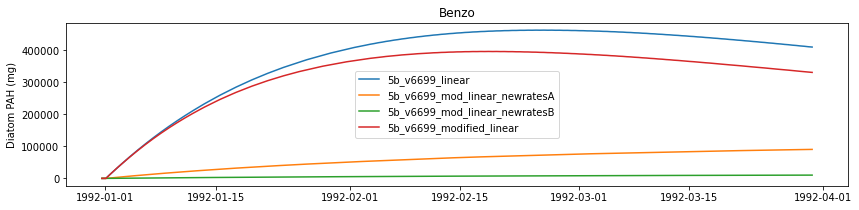

In [20]:
for pah in groups.pahs:
    compare_scenario('Diatom', pah)

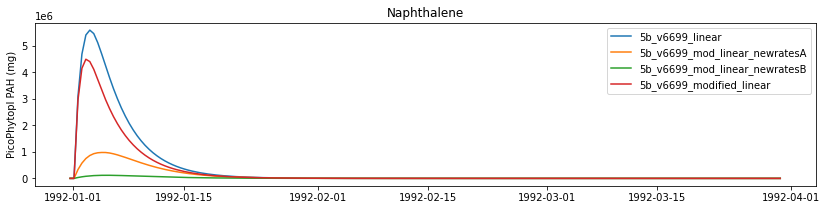

In [24]:
compare_scenario('PicoPhytopl', 'Naphthalene')

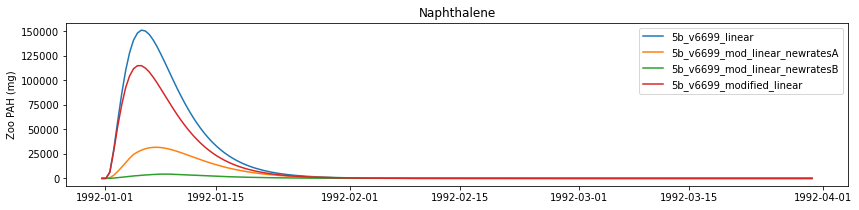

In [25]:
compare_scenario('Zoo','Naphthalene')

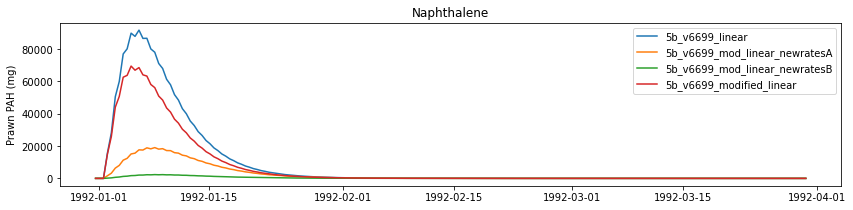

In [26]:
compare_scenario('Prawn','Naphthalene')

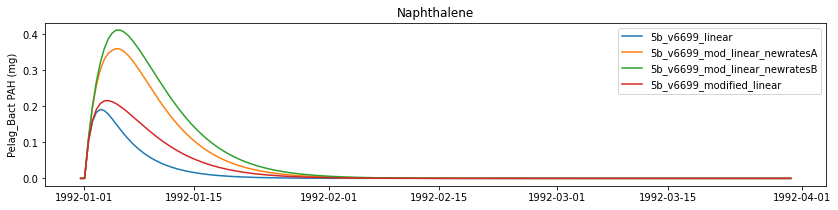

In [27]:
compare_scenario('Pelag_Bact','Naphthalene')

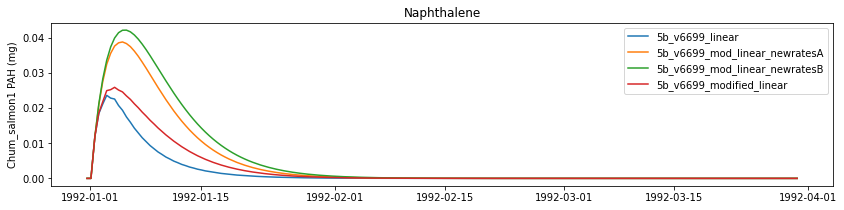

In [28]:
compare_scenario('Chum_salmon1','Naphthalene')

All contaminants on the same plot for each scenario

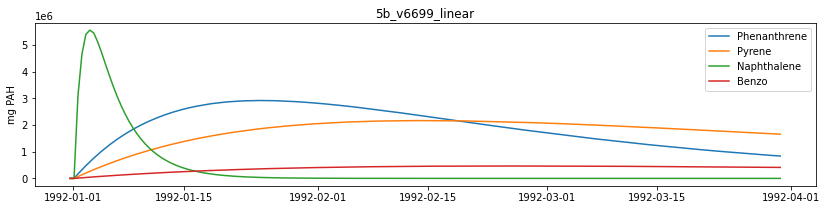

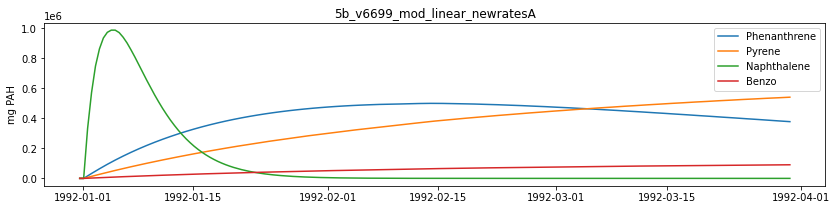

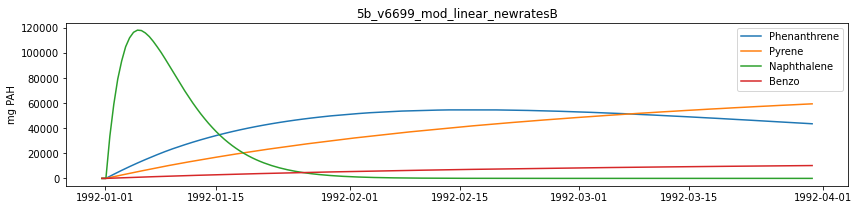

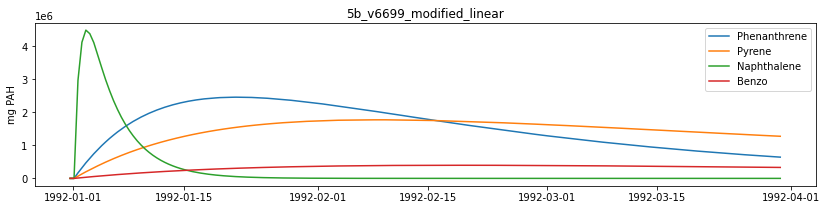

In [29]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    boxes = groups.salish_sea
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Diatom'+'_' + pah][:,boxes,:], np.nan)
        volume_tbl = np.ma.filled(scenario.variables['volume'][:,boxes,:], np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time, contam_mass_t)
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

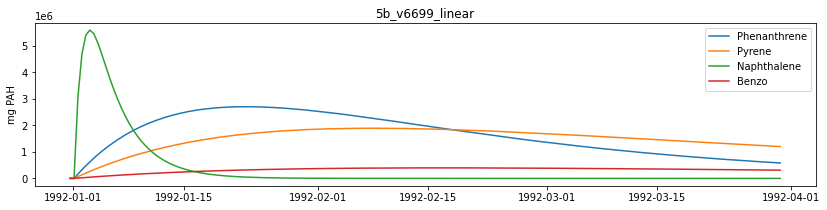

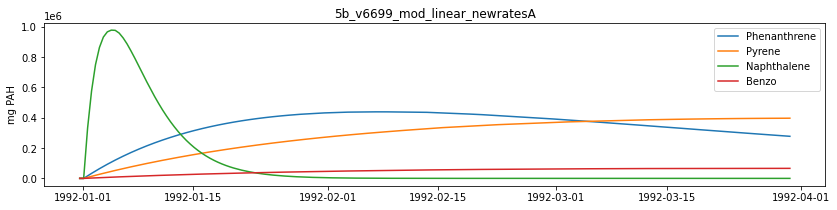

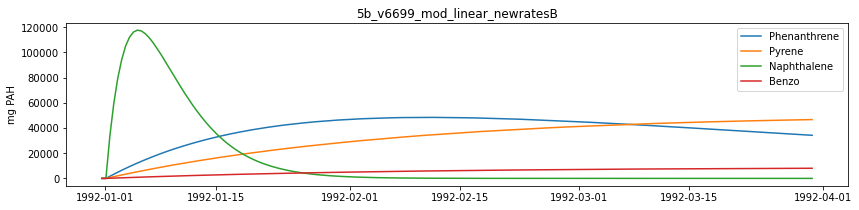

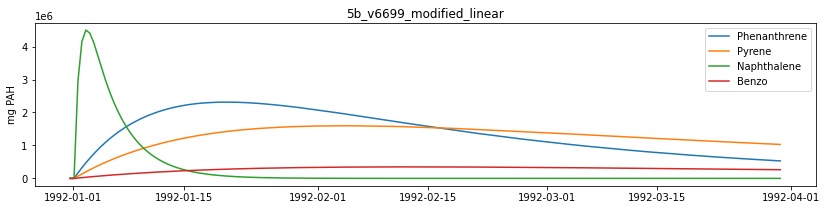

In [30]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    boxes = groups.salish_sea
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['PicoPhytopl'+'_' + pah][:,boxes,:], np.nan)
        volume_tbl = np.ma.filled(scenario.variables['volume'][:,boxes,:], np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time, contam_mass_t)
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

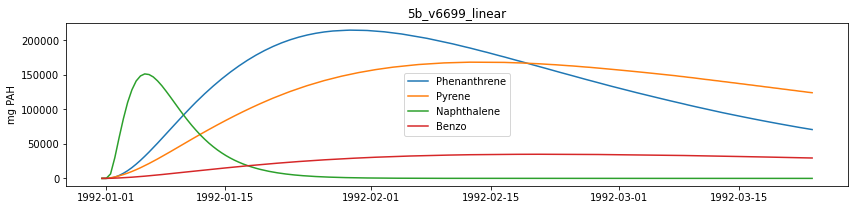

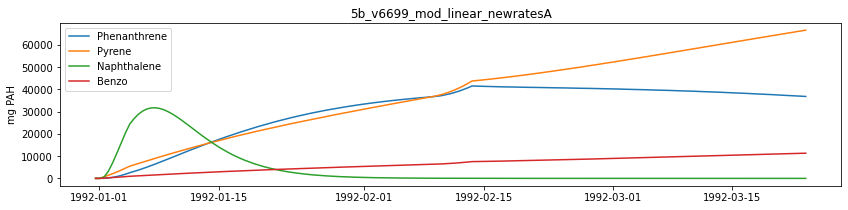

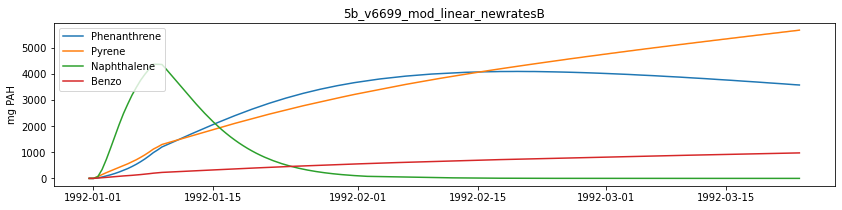

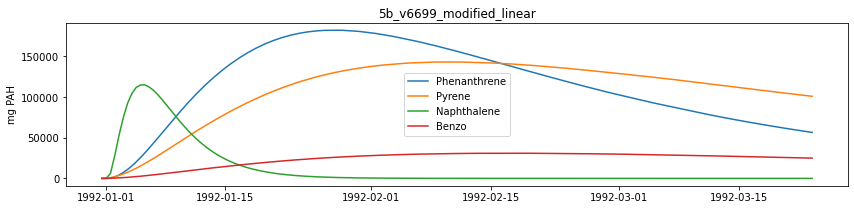

In [31]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Zoo'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

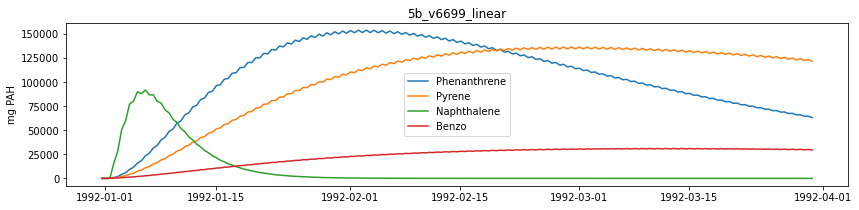

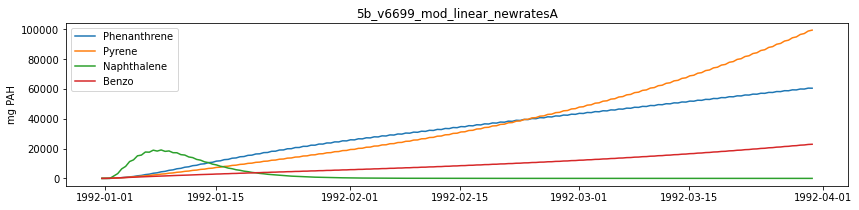

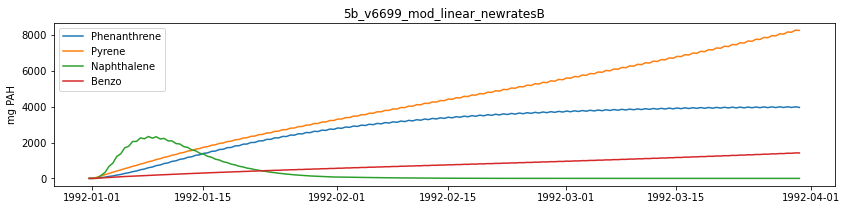

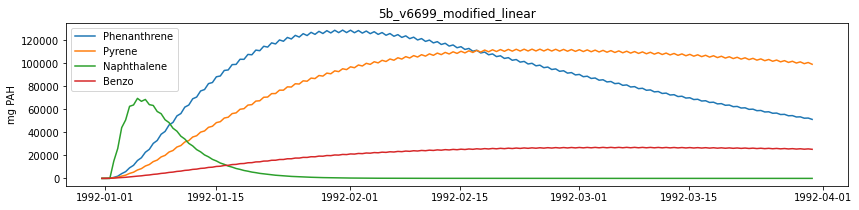

In [32]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    boxes = groups.salish_sea
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Prawn'+'_' + pah][:,boxes,:], np.nan)
        volume_tbl = np.ma.filled(scenario.variables['volume'][:,boxes,:], np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time, contam_mass_t)
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

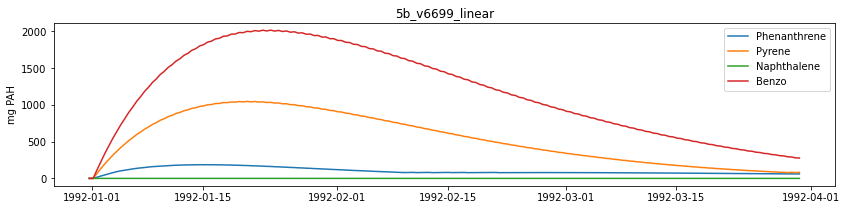

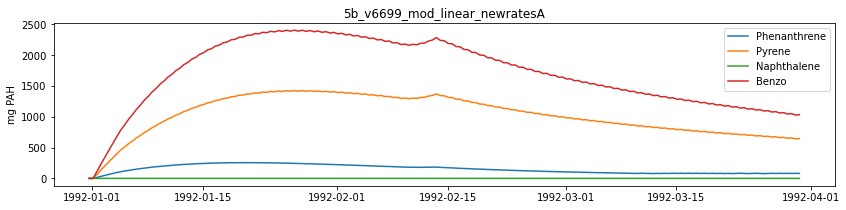

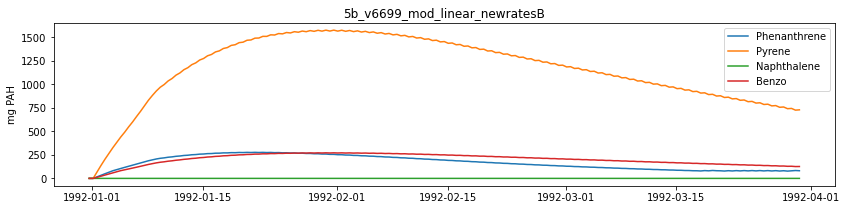

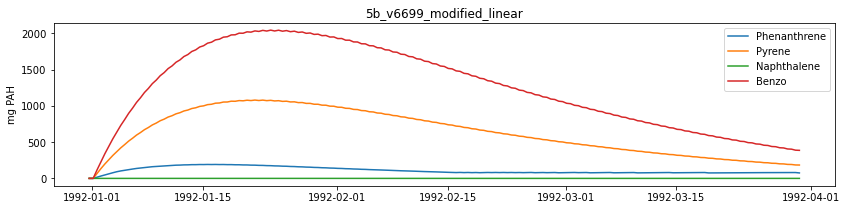

In [33]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    boxes = groups.salish_sea
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Pelag_Bact'+'_' + pah][:,boxes,:], np.nan)
        volume_tbl = np.ma.filled(scenario.variables['volume'][:,boxes,:], np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time, contam_mass_t)
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

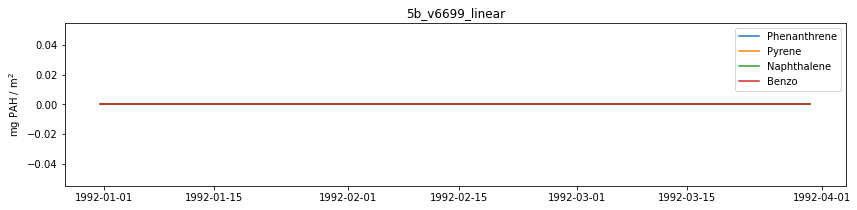

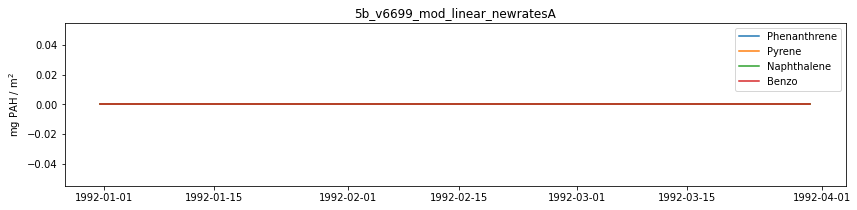

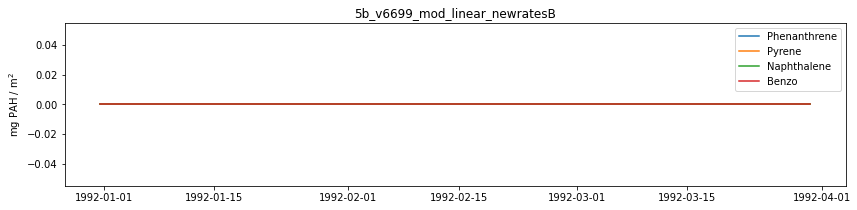

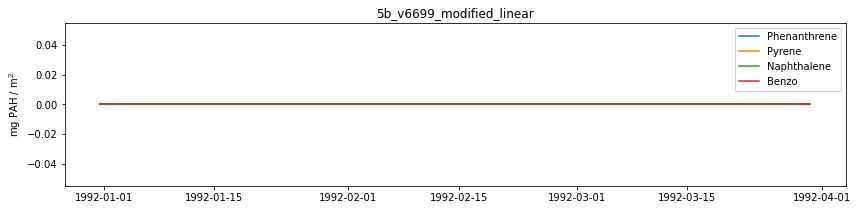

In [35]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    boxes = groups.salish_sea
    for pah in groups.pahs:    
        contam_tb = np.ma.filled(scenario.variables['Seagrass'+'_' + pah][:,boxes], np.nan)
        contam_t = contam_tb.sum(axis=1)
        ax.plot(time, contam_t)
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH / m$^2$')
        ax.set_title(name, fontsize = 12)

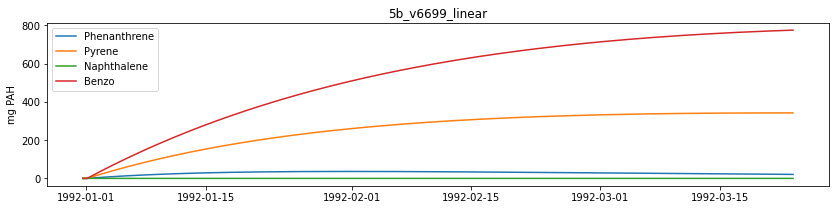

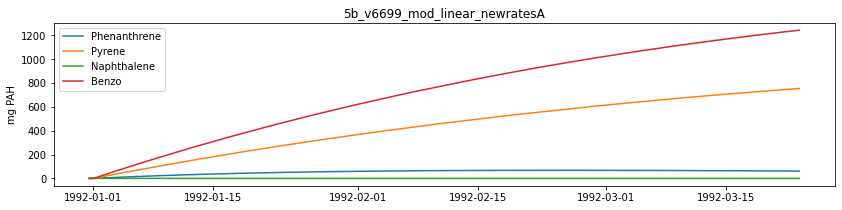

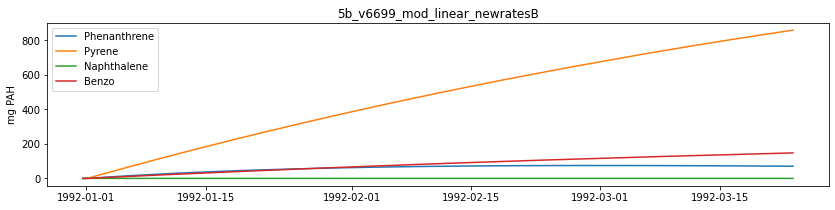

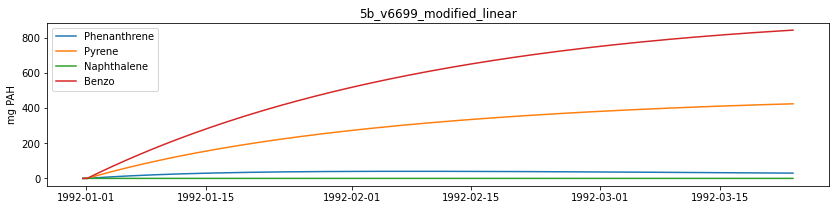

In [36]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Chum_salmon1'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

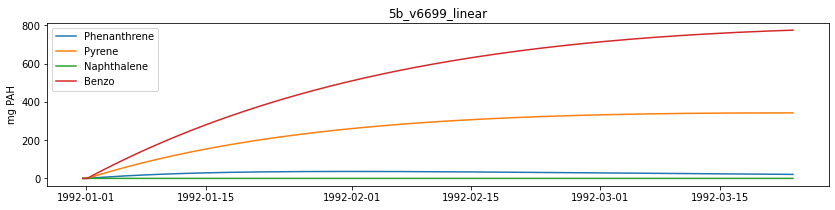

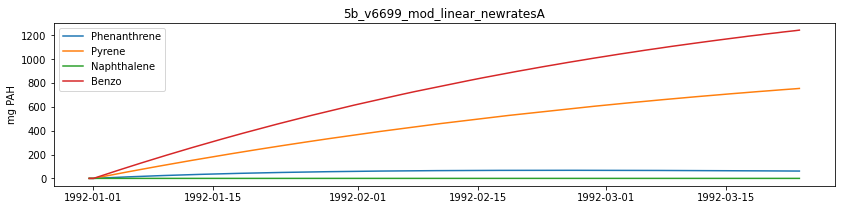

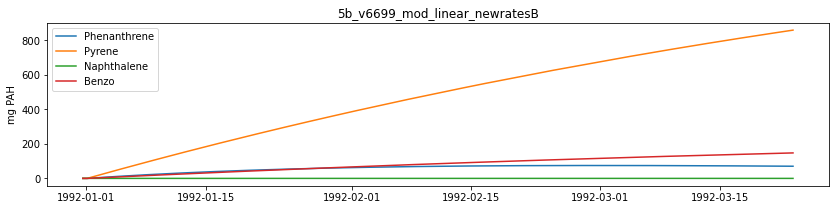

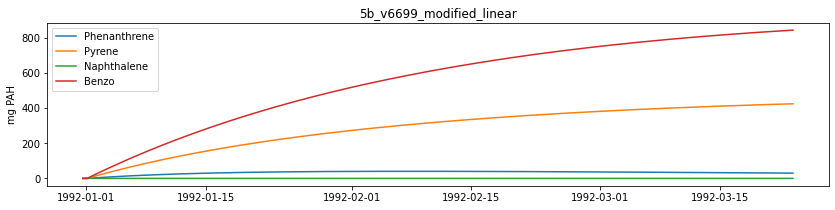

In [37]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Chum_salmon5'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

### Sigmoid

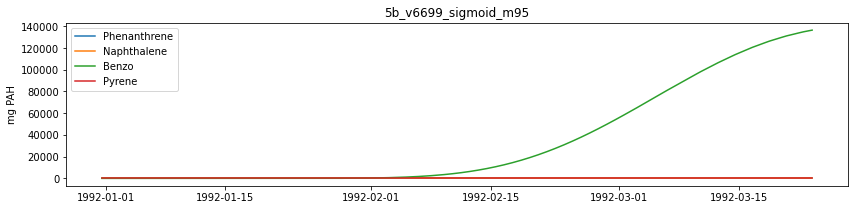

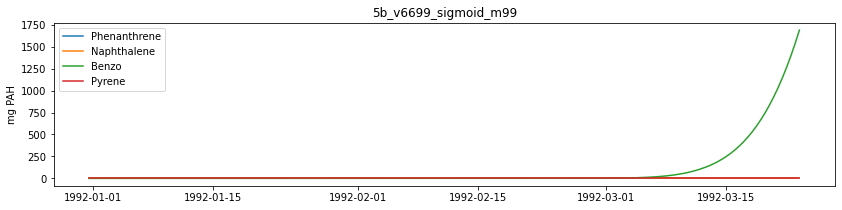

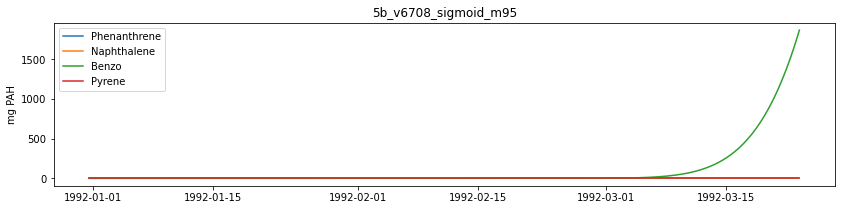

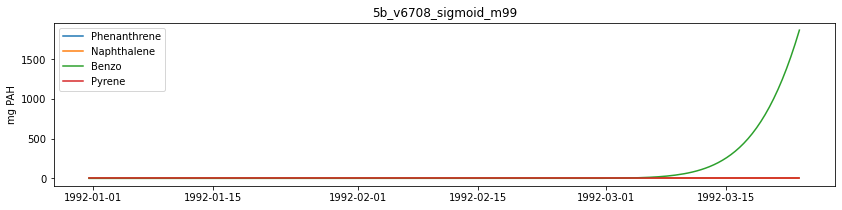

In [36]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Diatom'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

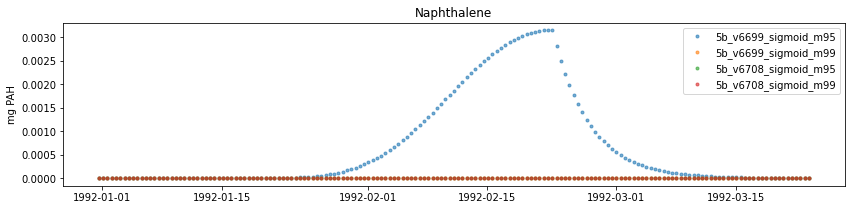

In [40]:
fig, ax = plt.subplots(figsize = (14,3))
names = []
pah = 'Naphthalene'
for scenario, path in zip(scenario_datasets, scenario_paths):
    nm = path.parent.stem
    names.append(nm)
    contam_tbl = np.ma.filled(scenario.variables['Diatom'+'_' + pah], np.nan)
    volume_tbl = np.ma.filled(scenario.volume, np.nan)
    contam_mass_tbl = contam_tbl * volume_tbl
    contam_mass_tb = contam_mass_tbl.sum(axis=2)
    contam_mass_t = contam_mass_tb.sum(axis=1)
    ax.plot(time[0:167], contam_mass_t[0:167], '.', alpha=0.6)
    ax.legend(names)
    ax.set_ylabel('mg PAH')
    ax.set_title(pah, fontsize = 12)

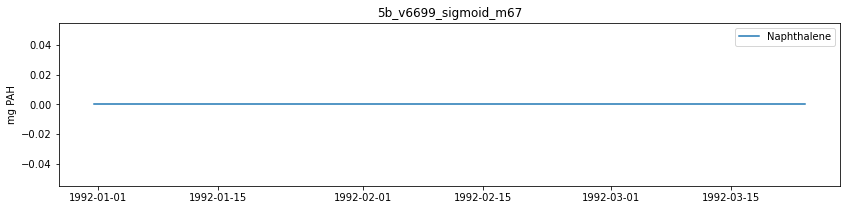

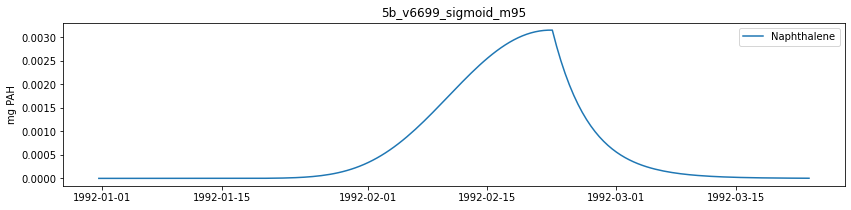

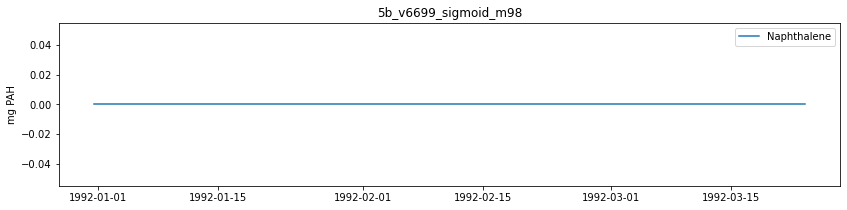

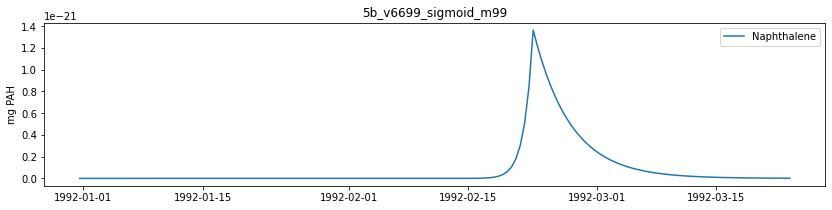

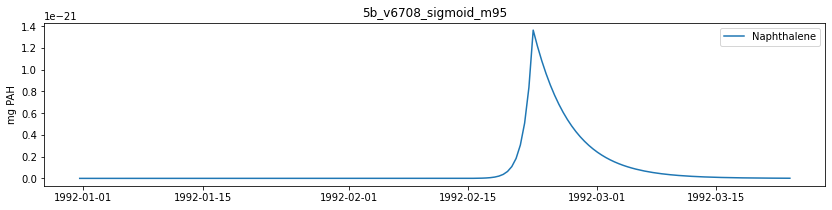

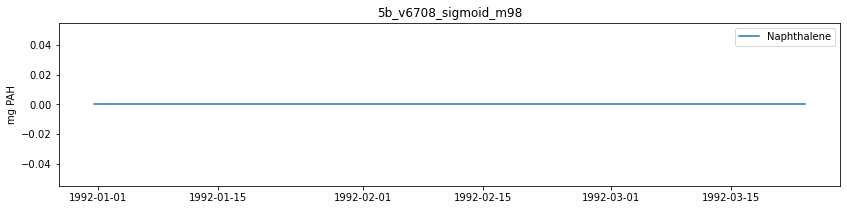

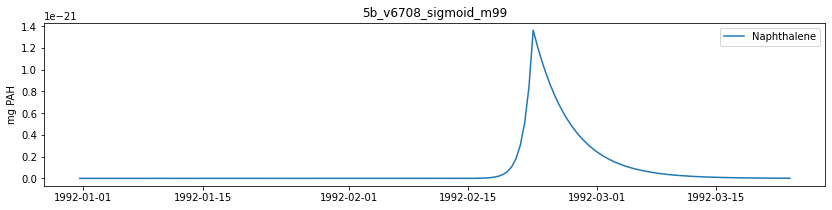

In [23]:
pah = 'Naphthalene'
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    nm = path.parent.stem
    contam_tbl = np.ma.filled(scenario.variables['Diatom'+'_' + pah], np.nan)
    volume_tbl = np.ma.filled(scenario.volume, np.nan)
    contam_mass_tbl = contam_tbl * volume_tbl
    contam_mass_tb = contam_mass_tbl.sum(axis=2)
    contam_mass_t = contam_mass_tb.sum(axis=1)
    ax.plot(time[0:167], contam_mass_t[0:167])
    ax.legend([pah])
    ax.set_ylabel('mg PAH')
    ax.set_title(nm, fontsize = 12)

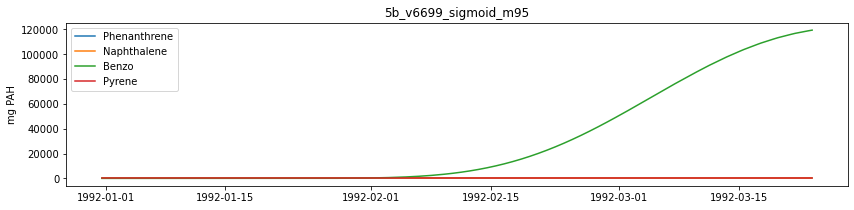

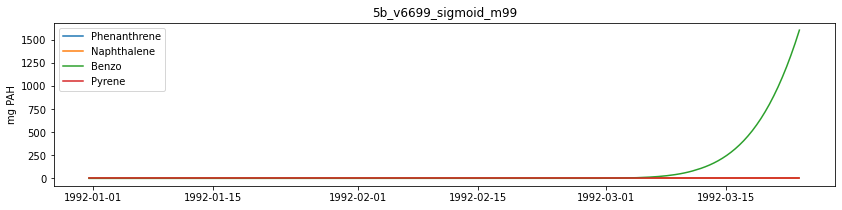

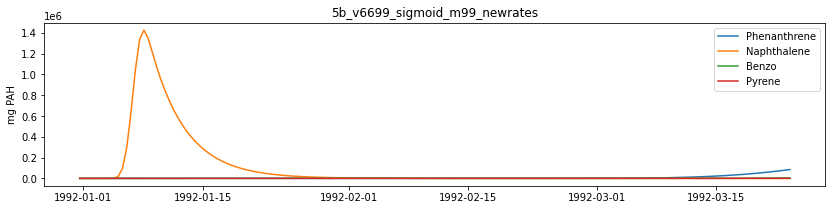

In [63]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['PicoPhytopl'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

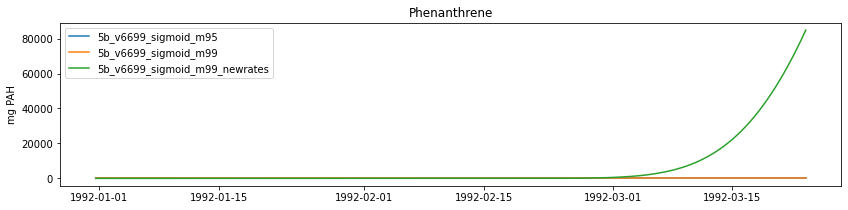

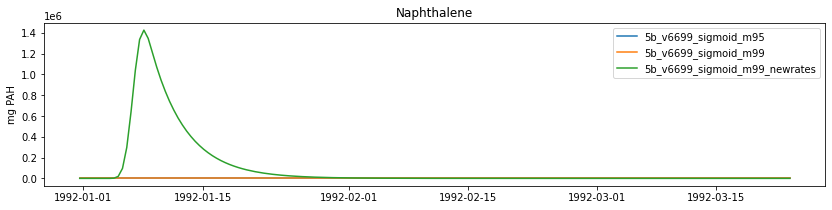

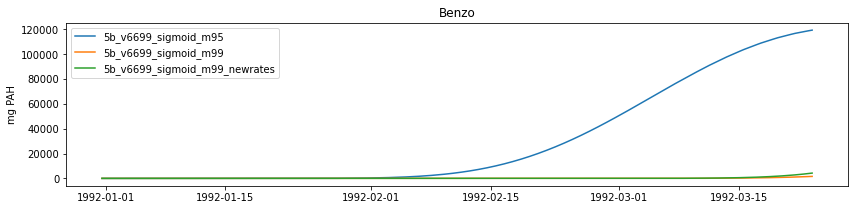

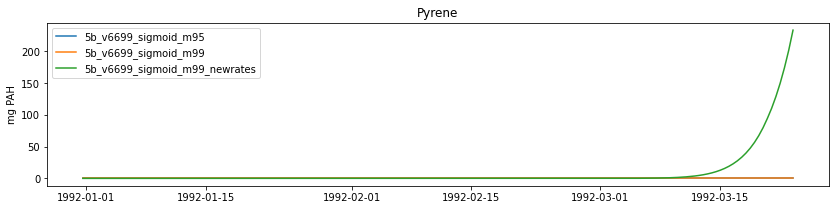

In [64]:
for pah in groups.pahs:    
    fig, ax = plt.subplots(figsize = (14,3))
    names = []
    for scenario, path in zip(scenario_datasets, scenario_paths):
        names.append(path.parent.stem)
        contam_tbl = np.ma.filled(scenario.variables['PicoPhytopl'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(names)
        ax.set_ylabel('mg PAH')
        ax.set_title(pah, fontsize = 12)

In [ ]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    boxes = groups.salish_sea
    for pah in groups.pahs:    
        contam_tb = np.ma.filled(scenario.variables['Seagrass'+'_' + pah][:,boxes], np.nan)
        volume_tb = np.ma.filled(scenario.variables['volume'][:,boxes,6], np.nan)
        contam_mass_tb = contam_tb * volume_tb
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time, contam_mass_t)
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

In [ ]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Zoo'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

In [ ]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Chum_salmon1'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

In [ ]:
for scenario, path in zip(scenario_datasets, scenario_paths):
    fig, ax = plt.subplots(figsize = (14,3))
    name = path.parent.stem
    for pah in groups.pahs:    
        contam_tbl = np.ma.filled(scenario.variables['Chum_salmon5'+'_' + pah], np.nan)
        volume_tbl = np.ma.filled(scenario.volume, np.nan)
        contam_mass_tbl = contam_tbl * volume_tbl
        contam_mass_tb = contam_mass_tbl.sum(axis=2)
        contam_mass_t = contam_mass_tb.sum(axis=1)
        ax.plot(time[0:167], contam_mass_t[0:167])
        ax.legend(groups.pahs)
        ax.set_ylabel('mg PAH')
        ax.set_title(name, fontsize = 12)

### All uptake together

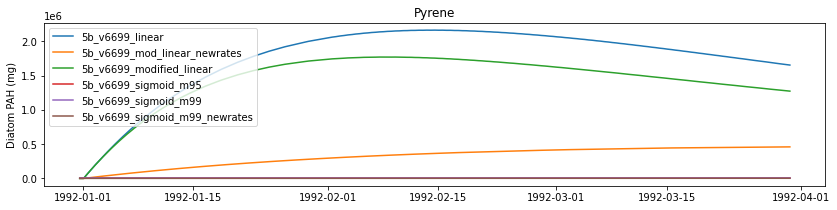

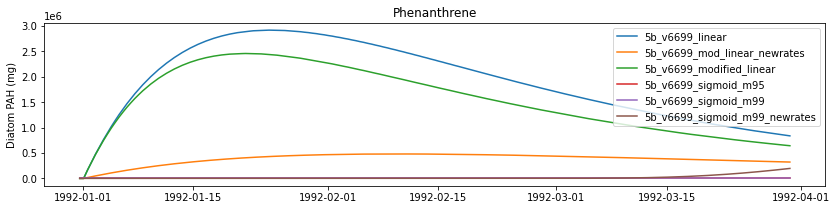

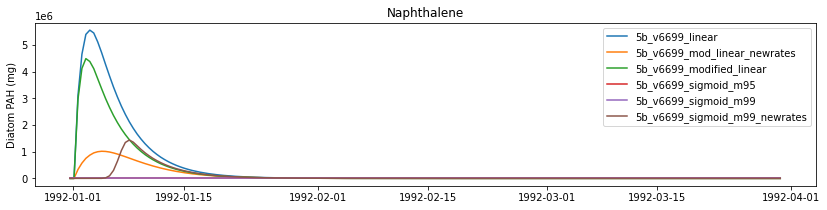

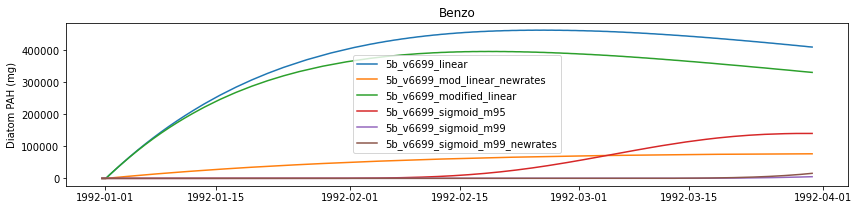

In [26]:
for pah in groups.pahs:
    compare_scenario('Diatom', pah)

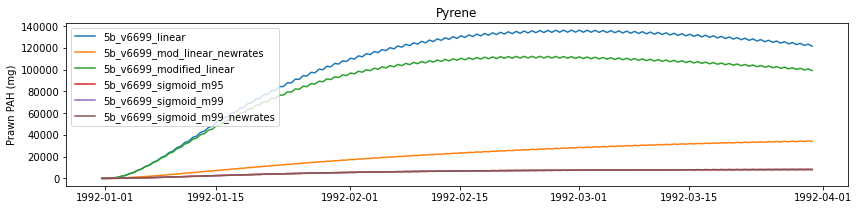

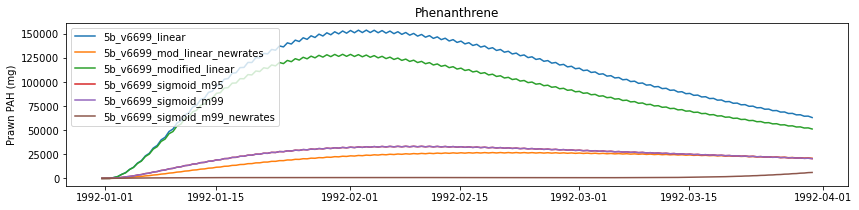

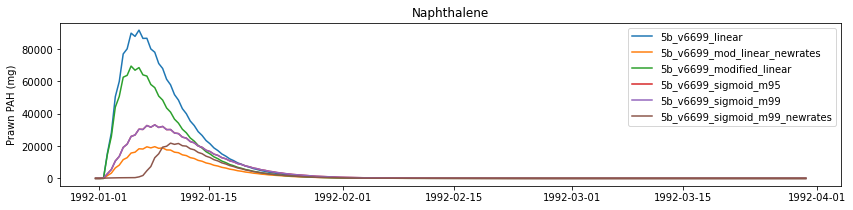

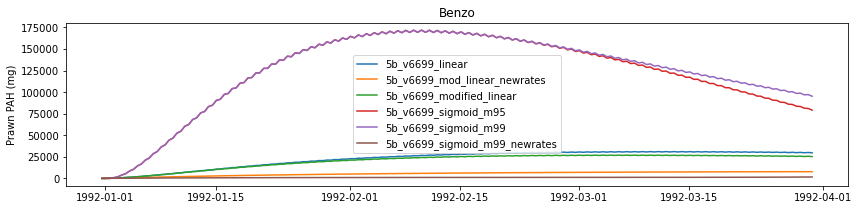

In [28]:
for pah in groups.pahs:
    compare_scenario('Prawn', pah)

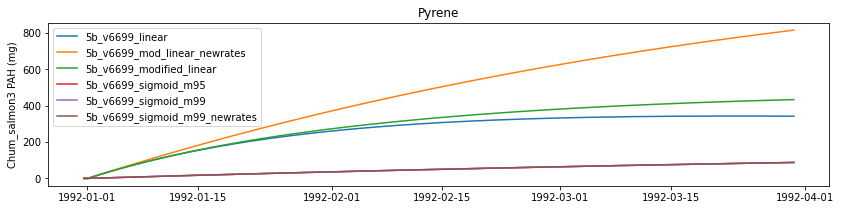

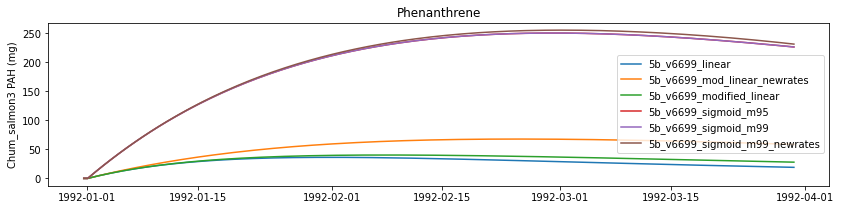

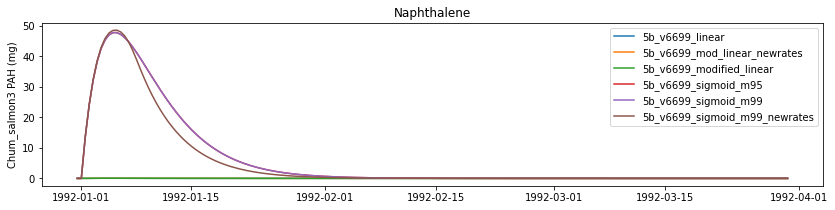

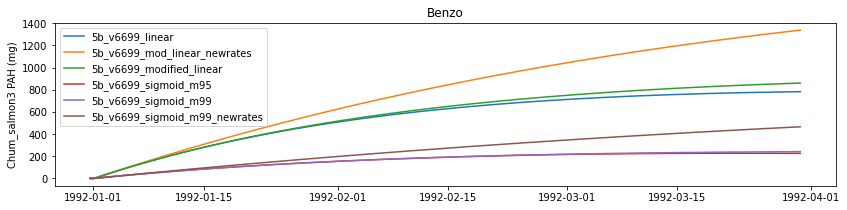

In [30]:
for pah in groups.pahs:
    compare_scenario('Chum_salmon3', pah)

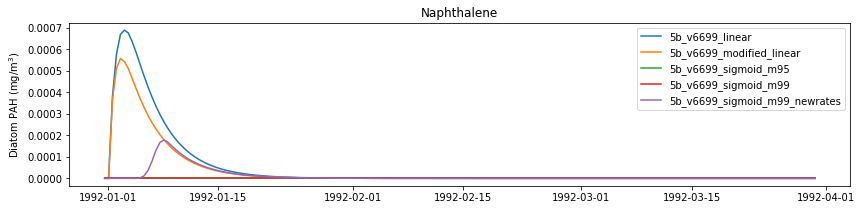

In [11]:
compare_scenario_m3('Diatom', 'Naphthalene')

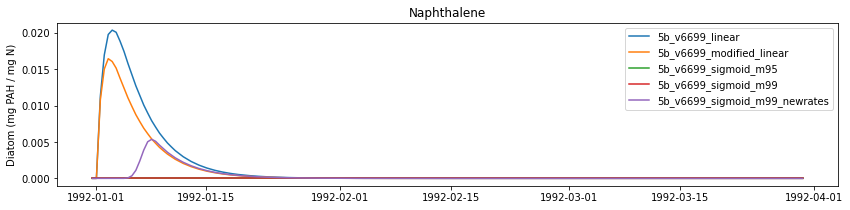

In [22]:
compare_scenario_perN('Diatom', 'Naphthalene')

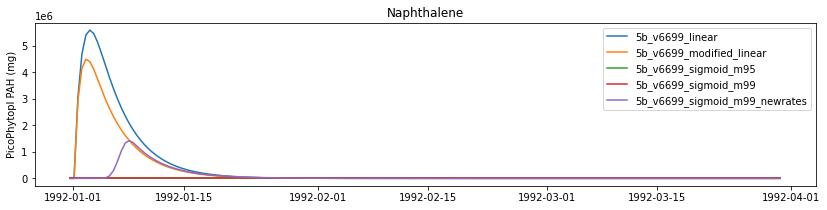

In [15]:
compare_scenario('PicoPhytopl', 'Naphthalene')

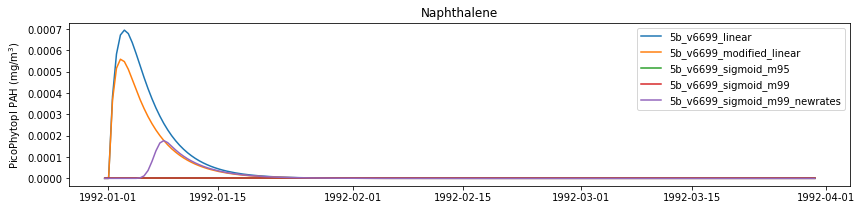

In [16]:
compare_scenario_m3('PicoPhytopl', 'Naphthalene')

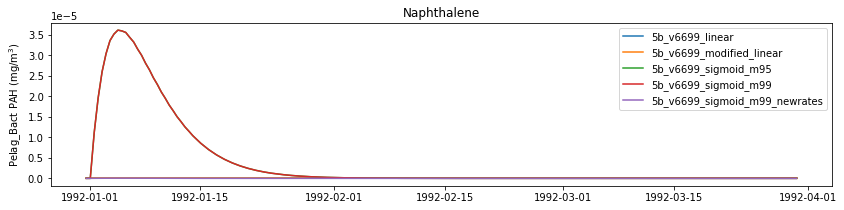

In [12]:
compare_scenario_m3('Pelag_Bact', 'Naphthalene')

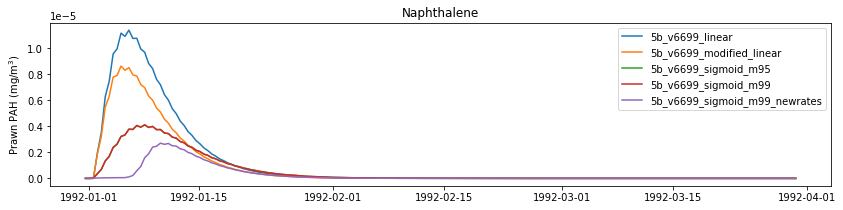

In [13]:
compare_scenario_m3('Prawn', 'Naphthalene')

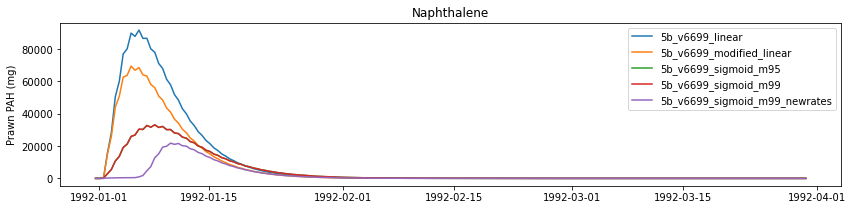

In [14]:
compare_scenario('Prawn', 'Naphthalene')

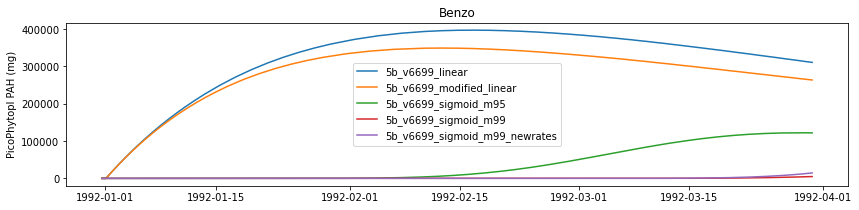

In [17]:
compare_scenario('PicoPhytopl', 'Benzo')

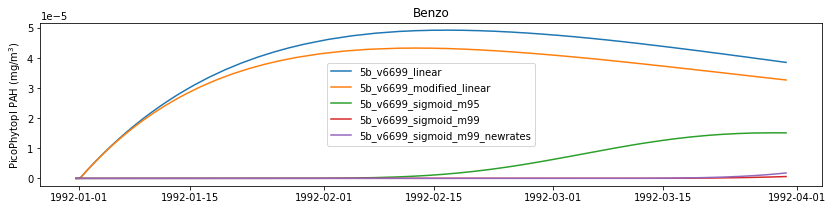

In [18]:
compare_scenario_m3('PicoPhytopl', 'Benzo')

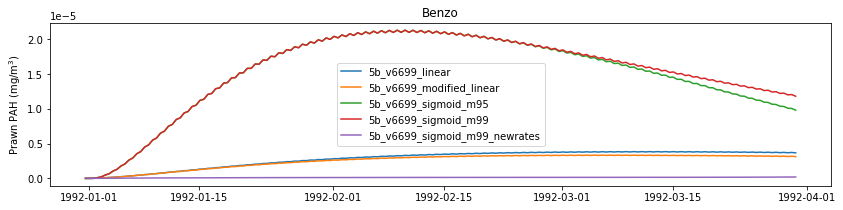

In [20]:
compare_scenario_m3('Prawn', 'Benzo')